<hr>
<center>
<h1> Final Project - UK Traffic Accident <h1>
<hr>

This final report provides visualization of UK Traffic Accident from 2007 to 2016 and the relationship between different attributes.

# Data
The data used in this final report comes from https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles, which is collected from the Open Data website of the UK Government, where they have been published by the Department of Transport. 

The dataset contains data points of each recored traffic accident in UK including environmental conditions, vehicle conditions and driver conditions. This helps the local authority investigate further details of traffic accidents to make adjustments to the infrastructures as well as laws for road safety and prevent potential similar accidents.

The dataset comprises of two csv files: 
+ Accident_Information.csv: every line in the file represents a unique traffic accident from 2005 - 2017 (https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles/data?select=Accident_Information.csv)

+ Vehicle_Information.csv: every line in the file represents the involvement of a unique vehicle in a unique traffic accident from 2004 - 2016 (https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles/data?select=Vehicle_Information.csv).

The two above-mentioned files/datasets can be linked through the unique traffic accident identifier (Accident_Index column).

For the purpose of this report and with limited data points in two csv files, I will only include all data points from 2007 to 2016.

As the dataset contains multiple columns, I will only list all used attributes with detailed descriptions for each attribute.

| Attribute           | Description                                                                                                                   |
|---------------------|-------------------------------------------------------------------------------------------------------------------------------|
| Accident_Index                  | Unique identifier for each accident                                                                                             |
| Accident_Severity        | The recored severity of each accident                           |
| Date                | The recoreded date of the traffic accident                                                                   |
| Day_of_Week               | The day of the week that the accident happened               |
| Time               | The time of the accident (only in hours and minutes)                              |
| Light_Conditions        | The light condition when the accident happened                                                                                      |
| Latitude         | The latitude of the accident                                          |
| Longitude| The longtitude of the accident                                                                       |
| Number_of_Casualties              | The number of casualities for each accident (both death and injuries)                                                                                          |
| Road_Surface_Conditions           | The condition of the road where the accident happened                          |
| Urban_or_Rural_Area                | Where the accident happened: rural area or urban area                                                                                |
| Weather_Conditions            | The weather condition when the accident happened                                                                     |
| Age_Band_of_Driver                | The age band of the drivers                                                                 |
| Sex_of_Driver      | The sex of the driver                                                                      |
| Vehicle_Type            | Type of the vehicle in the accident                 |


# Goal
1. How have traffic accidents in the UK changed from 2007 to 2016? Are there any patterns, or fluctuations in the number of cases in years, months, or hours?
2. To explore the correlation between vehicle types in traffic accidents and time, and location, analyze the difference between vehicle types in traffic accidents by time and various locations.
3. Answering the question of whether drivers' conditions and weather conditions affect the severity and contribute to the difference in the number of casualties. 

# Data Preparation
To begin the analysis, I imported all necessary libraries for data manipulation and visualization: numpy, matplotlib, pandas and seaborn. Then I read two datasets: "Accident_Information.csv" and 
"Vehicle_Information.csv" into two separate data frames. I filtered out any data points outside the year range of 2007 - 2016 before merging two data frames into one single data frame. 

In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# read the dataset
dataset1 = 'Accident_Information.csv'
dataset2 = 'Vehicle_Information.csv'
df1 = pd.read_csv(dataset1,encoding='latin1',dtype={'Accident_Index': str})
df2 = pd.read_csv(dataset2,encoding='latin1',dtype={'Accident_Index': str})

# filter the both data set to only contains data points in [2007, 2016]
df1 = df1[(df1['Year'] >= 2007) & (df1['Year'] <= 2016)]
df2 = df2[(df2['Year'] >= 2007) & (df2['Year'] <= 2016)]

# merge two datasets together by using Accident_Index as id
df = pd.merge(df1, df2, on='Accident_Index', how='inner')

# clean the previous datasets
del dataset1
del dataset2

# show number of data points
df.shape[0]

1831103

After getting the single data frame, I created a list of used attributes and continued to filter to get a data frame that only contains columns that are needed for the report (mentioned above).

In [3]:
# list of columns to keep for visualization
columns_to_keep = ['Accident_Index', 'Accident_Severity', 'Date','Day_of_Week','Time', 'Light_Conditions', 'Latitude', 'Longitude', 'Number_of_Casualties', 'Road_Surface_Conditions','Urban_or_Rural_Area','Weather_Conditions','Age_Band_of_Driver', 'Sex_of_Driver', 'Vehicle_Type']
# drop all unused columns
df = df[columns_to_keep]
# test the first five rows
df.head()

Accident_Index Accident_Severity        Date Day_of_Week   Time  \
0  200701BS66127           Serious  2007-08-26      Sunday  00:50   
1  200701BS67159           Serious  2007-09-18     Tuesday  15:35   
2  200701BS67370             Fatal  2007-10-03   Wednesday  03:30   
3  200701BS67515            Slight  2007-10-31   Wednesday  16:16   
4  200701BS67644           Serious  2007-10-09     Tuesday  19:21   

              Light_Conditions   Latitude  Longitude  Number_of_Casualties  \
0  Darkness - lighting unknown  51.517715  -0.210215                     1   
1                     Daylight  51.497750  -0.192556                     2   
2        Darkness - lights lit  51.482260  -0.179486                     3   
3        Darkness - lights lit  51.493319  -0.173572                     1   
4        Darkness - lights lit  51.491944  -0.171898                     1   

  Road_Surface_Conditions Urban_or_Rural_Area  Weather_Conditions  \
0                     Dry               Urban             Unknown   
1                     Dry               Urban  Fine no high winds   
2                     Dry               Urban  Fine no high winds   
3                     Dry               Urban  Fine no high winds   
4                     Dry               Urban  Fine no high winds   

  Age_Band_of_Driver Sex_of_Driver                          Vehicle_Type  
0            26 - 35          Male                                   Car  
1            56 - 65        Female                                   Car  
2            46 - 55          Male                 Taxi/Private hire car  
3            26 - 35          Male  Bus or coach (17 or more pass seats)  
4            36 - 45          Male                         Other vehicle

Since it is unnecessary to have different columns for date and time, I merged the "Time" column to the "Date" column to reduce the size of my data frame and convert the date to Pandas datetime format
for better data manipulation and any built-in functions.

In [4]:
# add "Time" columns to "Date" columns
df.Date = df.Date + ' ' + df.Time
# convert to panda datetime format
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d %H:%M')
# set as index
df.index = pd.DatetimeIndex(df.Date)
# test first five rows
df.head()

Accident_Index Accident_Severity                Date  \
Date                                                                       
2007-08-26 00:50:00  200701BS66127           Serious 2007-08-26 00:50:00   
2007-09-18 15:35:00  200701BS67159           Serious 2007-09-18 15:35:00   
2007-10-03 03:30:00  200701BS67370             Fatal 2007-10-03 03:30:00   
2007-10-31 16:16:00  200701BS67515            Slight 2007-10-31 16:16:00   
2007-10-09 19:21:00  200701BS67644           Serious 2007-10-09 19:21:00   

                    Day_of_Week   Time             Light_Conditions  \
Date                                                                  
2007-08-26 00:50:00      Sunday  00:50  Darkness - lighting unknown   
2007-09-18 15:35:00     Tuesday  15:35                     Daylight   
2007-10-03 03:30:00   Wednesday  03:30        Darkness - lights lit   
2007-10-31 16:16:00   Wednesday  16:16        Darkness - lights lit   
2007-10-09 19:21:00     Tuesday  19:21        Darkness - lights lit   

                      Latitude  Longitude  Number_of_Casualties  \
Date                                                              
2007-08-26 00:50:00  51.517715  -0.210215                     1   
2007-09-18 15:35:00  51.497750  -0.192556                     2   
2007-10-03 03:30:00  51.482260  -0.179486                     3   
2007-10-31 16:16:00  51.493319  -0.173572                     1   
2007-10-09 19:21:00  51.491944  -0.171898                     1   

                    Road_Surface_Conditions Urban_or_Rural_Area  \
Date                                                              
2007-08-26 00:50:00                     Dry               Urban   
2007-09-18 15:35:00                     Dry               Urban   
2007-10-03 03:30:00                     Dry               Urban   
2007-10-31 16:16:00                     Dry               Urban   
2007-10-09 19:21:00                     Dry               Urban   

                     Weather_Conditions Age_Band_of_Driver Sex_of_Driver  \
Date                                                                       
2007-08-26 00:50:00             Unknown            26 - 35          Male   
2007-09-18 15:35:00  Fine no high winds            56 - 65        Female   
2007-10-03 03:30:00  Fine no high winds            46 - 55          Male   
2007-10-31 16:16:00  Fine no high winds            26 - 35          Male   
2007-10-09 19:21:00  Fine no high winds            36 - 45          Male   

                                             Vehicle_Type  
Date                                                       
2007-08-26 00:50:00                                   Car  
2007-09-18 15:35:00                                   Car  
2007-10-03 03:30:00                 Taxi/Private hire car  
2007-10-31 16:16:00  Bus or coach (17 or more pass seats)  
2007-10-09 19:21:00                         Other vehicle

I continued to drop "Time", "Date" and "Day_of_Week" columns since I already created a pandas datetime column and set it as the index column of my data frame.

In [5]:
# continue to drop all unused columns
dropped_columns = ['Time', 'Date', 'Day_of_Week']
df = df.drop(columns=dropped_columns)
# test the first five rows
df.head()

Accident_Index Accident_Severity  \
Date                                                   
2007-08-26 00:50:00  200701BS66127           Serious   
2007-09-18 15:35:00  200701BS67159           Serious   
2007-10-03 03:30:00  200701BS67370             Fatal   
2007-10-31 16:16:00  200701BS67515            Slight   
2007-10-09 19:21:00  200701BS67644           Serious   

                                Light_Conditions   Latitude  Longitude  \
Date                                                                     
2007-08-26 00:50:00  Darkness - lighting unknown  51.517715  -0.210215   
2007-09-18 15:35:00                     Daylight  51.497750  -0.192556   
2007-10-03 03:30:00        Darkness - lights lit  51.482260  -0.179486   
2007-10-31 16:16:00        Darkness - lights lit  51.493319  -0.173572   
2007-10-09 19:21:00        Darkness - lights lit  51.491944  -0.171898   

                     Number_of_Casualties Road_Surface_Conditions  \
Date                                                                
2007-08-26 00:50:00                     1                     Dry   
2007-09-18 15:35:00                     2                     Dry   
2007-10-03 03:30:00                     3                     Dry   
2007-10-31 16:16:00                     1                     Dry   
2007-10-09 19:21:00                     1                     Dry   

                    Urban_or_Rural_Area  Weather_Conditions  \
Date                                                          
2007-08-26 00:50:00               Urban             Unknown   
2007-09-18 15:35:00               Urban  Fine no high winds   
2007-10-03 03:30:00               Urban  Fine no high winds   
2007-10-31 16:16:00               Urban  Fine no high winds   
2007-10-09 19:21:00               Urban  Fine no high winds   

                    Age_Band_of_Driver Sex_of_Driver  \
Date                                                   
2007-08-26 00:50:00            26 - 35          Male   
2007-09-18 15:35:00            56 - 65        Female   
2007-10-03 03:30:00            46 - 55          Male   
2007-10-31 16:16:00            26 - 35          Male   
2007-10-09 19:21:00            36 - 45          Male   

                                             Vehicle_Type  
Date                                                       
2007-08-26 00:50:00                                   Car  
2007-09-18 15:35:00                                   Car  
2007-10-03 03:30:00                 Taxi/Private hire car  
2007-10-31 16:16:00  Bus or coach (17 or more pass seats)  
2007-10-09 19:21:00                         Other vehicle

For data cleaning, I used the dropna() function to drop any rows with more or equal to 1 NaN value. As my data frame is extremely big, this won't affect the required number of rows and columns. 

In [6]:
# drop all rows with more than 1 NaN
df=df.dropna()
# check number of data points left
df.shape[0]

1831025

To prevent order bias and create a smaller data frame as well as reduce computational costs and aim for a more representative and precise visualization, I sampled my current data frame and randomly retained 50000 data points using the sample() function. 

In [7]:
# randomly select 50000 data points from the dataset
df = df.sample(n=50000)
# check number of data points after sampling
df.shape[0]
# check the first five rows
df.head()

Accident_Index Accident_Severity Light_Conditions  \
Date                                                                    
2016-10-30 16:26:00  2016430316090            Slight         Daylight   
2014-12-23 11:40:00  2014170S12994            Slight         Daylight   
2009-07-31 13:05:00  2009559D03086            Slight         Daylight   
2016-02-03 12:43:00  201601HT20087            Slight         Daylight   
2016-03-15 18:45:00  2016460053132            Slight         Daylight   

                      Latitude  Longitude  Number_of_Casualties  \
Date                                                              
2016-10-30 16:26:00  51.522720  -0.572526                     1   
2014-12-23 11:40:00  54.582107  -1.328160                     1   
2009-07-31 13:05:00  50.540279  -2.444923                     3   
2016-02-03 12:43:00  51.514447  -0.039553                     1   
2016-03-15 18:45:00  51.428533   0.334649                     1   

                    Road_Surface_Conditions Urban_or_Rural_Area  \
Date                                                              
2016-10-30 16:26:00                     Dry               Urban   
2014-12-23 11:40:00                     Dry               Urban   
2009-07-31 13:05:00             Wet or damp               Rural   
2016-02-03 12:43:00                     Dry               Urban   
2016-03-15 18:45:00                     Dry               Urban   

                        Weather_Conditions Age_Band_of_Driver Sex_of_Driver  \
Date                                                                          
2016-10-30 16:26:00     Fine no high winds            16 - 20          Male   
2014-12-23 11:40:00     Fine no high winds            26 - 35        Female   
2009-07-31 13:05:00  Raining no high winds            26 - 35          Male   
2016-02-03 12:43:00     Fine no high winds            36 - 45        Female   
2016-03-15 18:45:00     Fine no high winds            46 - 55          Male   

                                         Vehicle_Type  
Date                                                   
2016-10-30 16:26:00                               Car  
2014-12-23 11:40:00                               Car  
2009-07-31 13:05:00  Minibus (8 - 16 passenger seats)  
2016-02-03 12:43:00                               Car  
2016-03-15 18:45:00                               Car

Finally, I used the info() function to get information about my final dataset. 

In [8]:
# check information on the final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2016-10-30 16:26:00 to 2015-08-06 06:03:00
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accident_Index           50000 non-null  object 
 1   Accident_Severity        50000 non-null  object 
 2   Light_Conditions         50000 non-null  object 
 3   Latitude                 50000 non-null  float64
 4   Longitude                50000 non-null  float64
 5   Number_of_Casualties     50000 non-null  int64  
 6   Road_Surface_Conditions  50000 non-null  object 
 7   Urban_or_Rural_Area      50000 non-null  object 
 8   Weather_Conditions       50000 non-null  object 
 9   Age_Band_of_Driver       50000 non-null  object 
 10  Sex_of_Driver            50000 non-null  object 
 11  Vehicle_Type             50000 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.0+ MB


# Exploratory Data Analysis

## 1. Trend
Let's start by analyzing the changes in the number of traffic accidents in the UK over the years. I grouped the data points by year and counted the number of accidents per year using size(). 

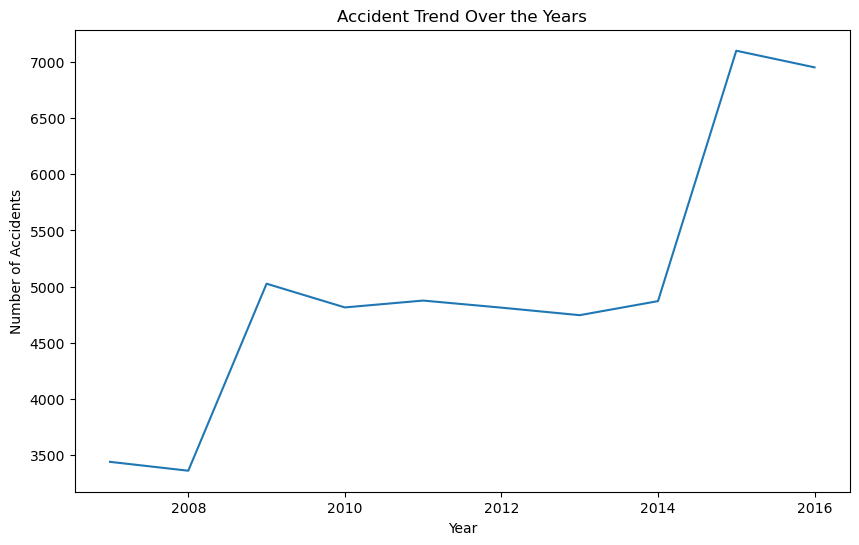

In [9]:
# group the data points based on years
accident_trend_year = df.groupby([df.index.year]).size()

# plot the accident trend over the years
accident_trend_year.plot(figsize=(10, 6), xlabel='Year', ylabel='Number of Accidents', title='Accident Trend Over the Years');

From the line plot above, there has been a significant increase in number of accidents over the years. After a rise in the number of cases in 2009, the line fluctuated over the span of 5 years until the number of cases rose dramatically again between 2014 and 2016. The highest number is over 7000 cases in around 2015. Nevertheless, for a more accurate visualization, I grouped the data based on both years and months. 

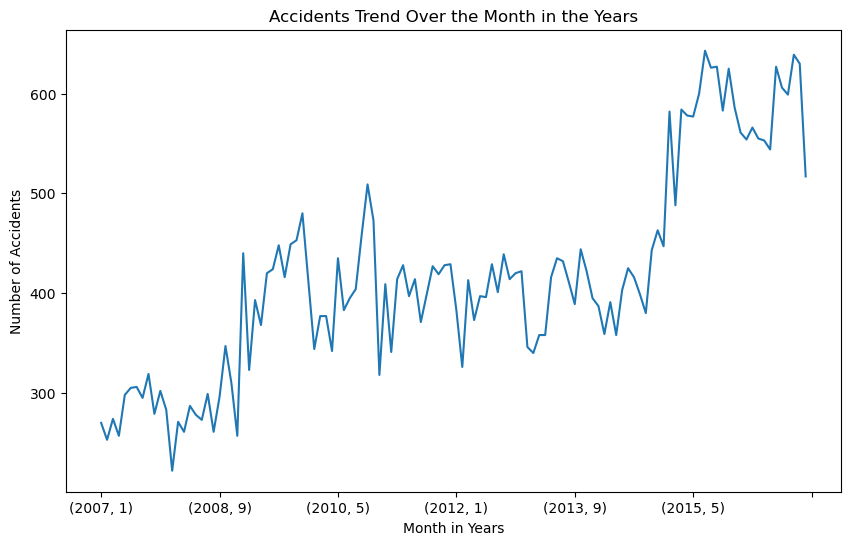

In [10]:
# group the data points based on years and months
accident_trend_month = df.groupby([df.index.year,df.index.month]).size()

# plot the accident trend over the years
accident_trend_month.plot(figsize=(10, 6), xlabel='Month in Years', ylabel='Number of Accidents', title='Accidents Trend Over the Month in the Years');

While the trend remains unchanged with the latter plot, the line varies noticeably after months are added, indicating that further investigation into the number of accidents per month is needed. I used a heatmap to see the correlation between months and years with the total accident count.

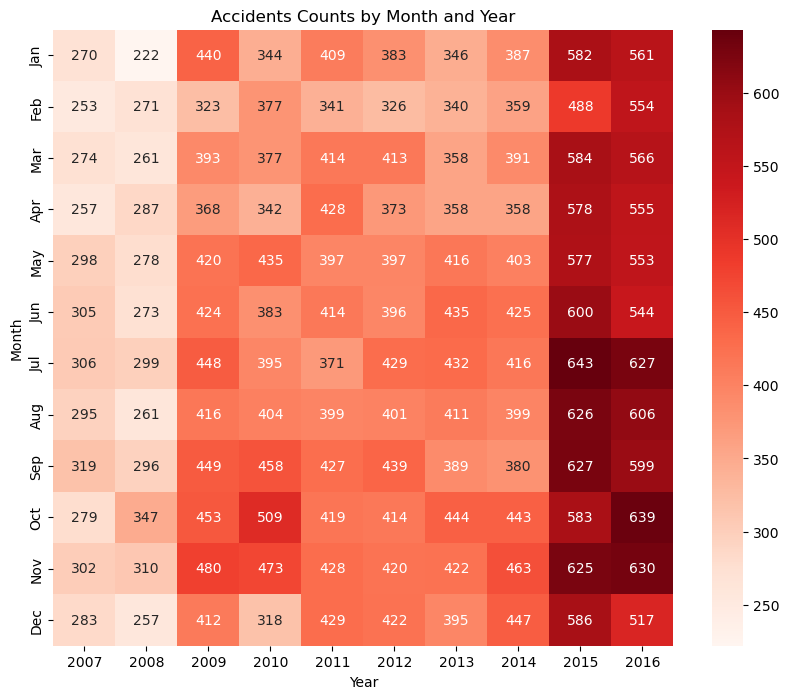

In [11]:
# pivot to get the accident counts in months and years
month_by_year = df.pivot_table(values='Accident_Index', index=df.index.month, columns=df.index.year, aggfunc=np.size).fillna(0)

# index label in months names
month_by_year.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# cast year into int (for some reasons it kept displaying years in float)
month_by_year.columns = month_by_year.columns.astype(int)

# set the size of the figure
plt.figure(figsize=(10, 8))

# heatmap using seaborn
sns.heatmap(month_by_year, cmap='Reds', annot=True, fmt='g')

# set title and labels
plt.title('Accidents Counts by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')

# display the heatmap
plt.show()

Besides the peak in accident rates between 2015 and 2016 and overall growth in cases throughout the decade, the temporal distribution of accidents over the months for each year is also worth mentioning. July and November are months that witnessed some of the highest points in accident rates across the years. The number of cases in January 2008 (222 accidents) and July 2015 (643 accidents) are the lowest and highest in the heatmap respectively.  

This figure also intrigued me whether there were any underlying factors or seasonal influences that may affect the distribution of accident rates. Further investigations are needed, and I decided to keep visualizing the trend based on time series data. The plot below shows the accident trend over days of the week using the same methodology.

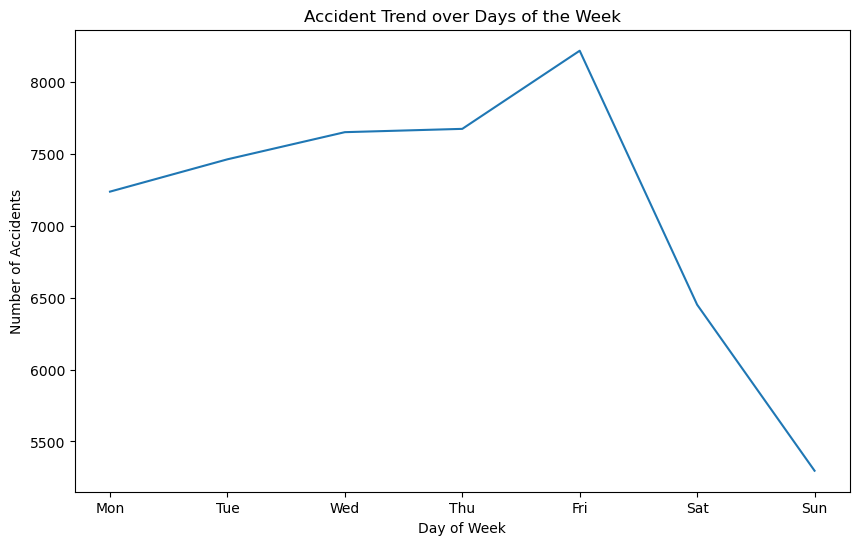

In [12]:
# group data based on days of the week
accident_trend_dayofweek = df.groupby(df.index.dayofweek).size()

# weekdays' names
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# plot the accident trend over days of the week
plt.figure(figsize=(10, 6))
accident_trend_dayofweek.plot()

# customize day labels
plt.xticks(ticks=range(7), labels=day_labels)

# set title and labels
plt.title('Accident Trend over Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')

# display the plot
plt.show()

The number of accidents during weekdays was higher compared to the weekend and climbed steadily until it reached its peak value on Friday. There is a significant drop during the weekend, and Sunday witnessed the lowest in the week, which is understandable as it is not an office day and schools are off. This observation suggests that Friday tends to have a higher incidence of traffic accidents compared to other days. 

Finally, I use a histogram to see the distribution of accidents within different hours of the day.  

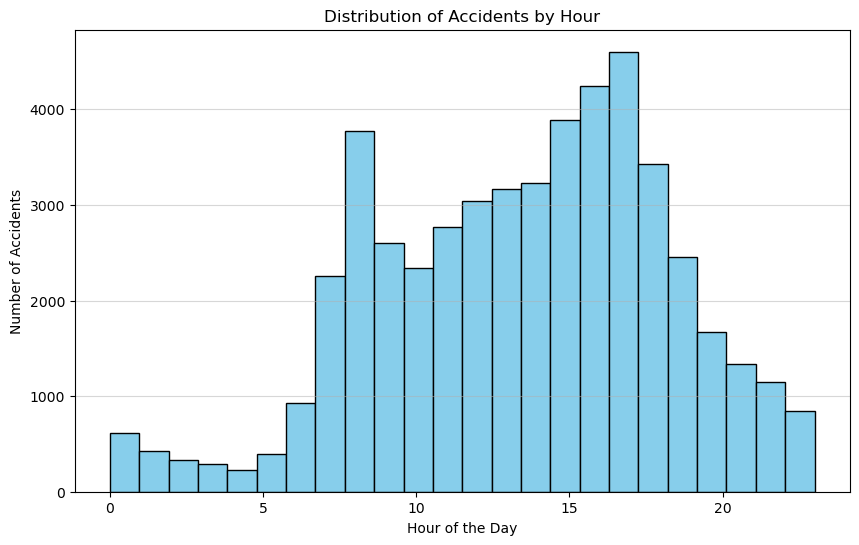

In [13]:
# plot histogram of distribution of accidents by hours
plt.figure(figsize=(10, 6))
plt.hist(df.index.hour, bins=24, color='skyblue', edgecolor='black')
# set title and labels
plt.title('Distribution of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
# set grid
plt.grid(axis='y', alpha=0.5)
plt.show()

As expected, the number of accidents tends to be the highest during rush hours (7-9 am and 4-6 pm). This can be obviously explained as these are common time frames for commuting either for work or school. Midnight till early morning (5 am) is the time when there was the least amount of cases, as this is the typical time for sleeping and less likely for a traffic jam or traffic accident to happen. Again, a heatmap will be used to investigate any correlation between the number of accidents based on both days of the week and hours of the day. 

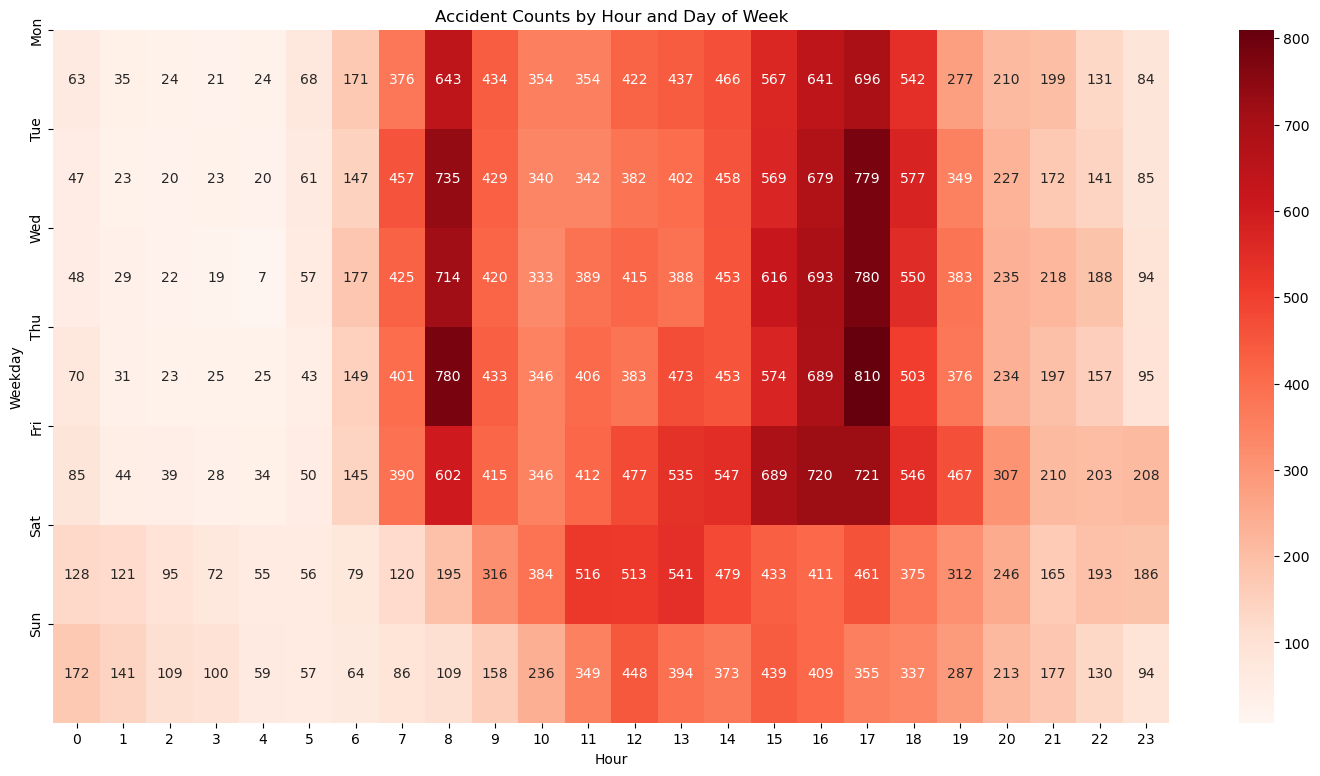

In [14]:
# pivot to get the accident counts in hour by weekday
hour_by_weekday  = df.pivot_table(values='Accident_Index', index=df.index.dayofweek, columns=df.index.hour, aggfunc=np.size).fillna(0)
# cast hours into int
hour_by_weekday.columns = hour_by_weekday.columns.astype(int)

# set the size of the heatmap figure
plt.figure(figsize=(18,9))
# Create the heatmap using seaborn
sns.heatmap(hour_by_weekday, cmap='Reds', annot=True, fmt='g')

# set the title and labels
plt.title('Accident Counts by Hour and Day of Week')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.yticks(ticks=range(7), labels = day_labels)

# display the heatmap
plt.show()

The heatmap suggested that traffic accidents are more prevalent during working hours, especially rush hours. More accidents can be found on weekdays compared to weekends. No further investigations are necessary for trends of traffic accidents using time series.

Ultimately, the analysis of UK traffic accidents showed a drastic increase in the number of traffic accidents over the years. Moreover, hours of the day emerge as the most influential time stamp factors that affect accident counts, with accidents being more prevalent during rush hours and less from midnight till early morning. Sunday also stands as the day where there was the least amount of traffic accidents.

## 2. Correlation

### 2.1. Vehicle Types analysis

Let's begin with exploring different types of vehicles involved in UK traffic accidents over the years. We can do this by grouping the data based on the "Vehicle_Type" attribute and using built-in value_counts to calculate the number of each vehicle. Then we can create another data frame that consists of  "Vehicle_Type" and "Count" attributes and display it.

In [24]:
# group the data by vehicle type and count the number for each vehicle
vehicle_counts = df.Vehicle_Type.value_counts()

# create a dataframe from vehicle counts
vehicle_counts_df = pd.DataFrame({'Vehicle Type': vehicle_counts.index, 'Count': vehicle_counts.values})

# display the dataframe
vehicle_counts_df

Vehicle Type  Count
0                                     Car  37338
1     Van / Goods 3.5 tonnes mgw or under   2746
2                   Motorcycle over 500cc   1585
3    Bus or coach (17 or more pass seats)   1523
4              Motorcycle 125cc and under   1497
5           Goods 7.5 tonnes mgw and over   1090
6                             Pedal cycle   1067
7                   Taxi/Private hire car   1059
8               Motorcycle 50cc and under    509
9   Motorcycle over 125cc and up to 500cc    507
10        Goods over 3.5t. and under 7.5t    390
11                          Other vehicle    334
12                   Agricultural vehicle    140
13       Minibus (8 - 16 passenger seats)    115
14         Goods vehicle - unknown weight     49
15                Motorcycle - unknown cc     19
16                       Mobility scooter     14
17           Data missing or out of range      9
18                           Ridden horse      5
19                                   Tram      3
20                    Electric motorcycle      1

We can see that "Car" is the most dominant type of vehicle with a number of 37388. There is only 1 electric motorcycle in the whole data frame.

To see the actual distribution of vehicle types, a pie chart is ideal. It provides a clear visual representation of the proportions of vehicle types. Below is the pie chart depicting the distribution of types of vehicles. I group all types of vehicles with a proportion lower than 2% into the "Other" category to make the chart more readable.

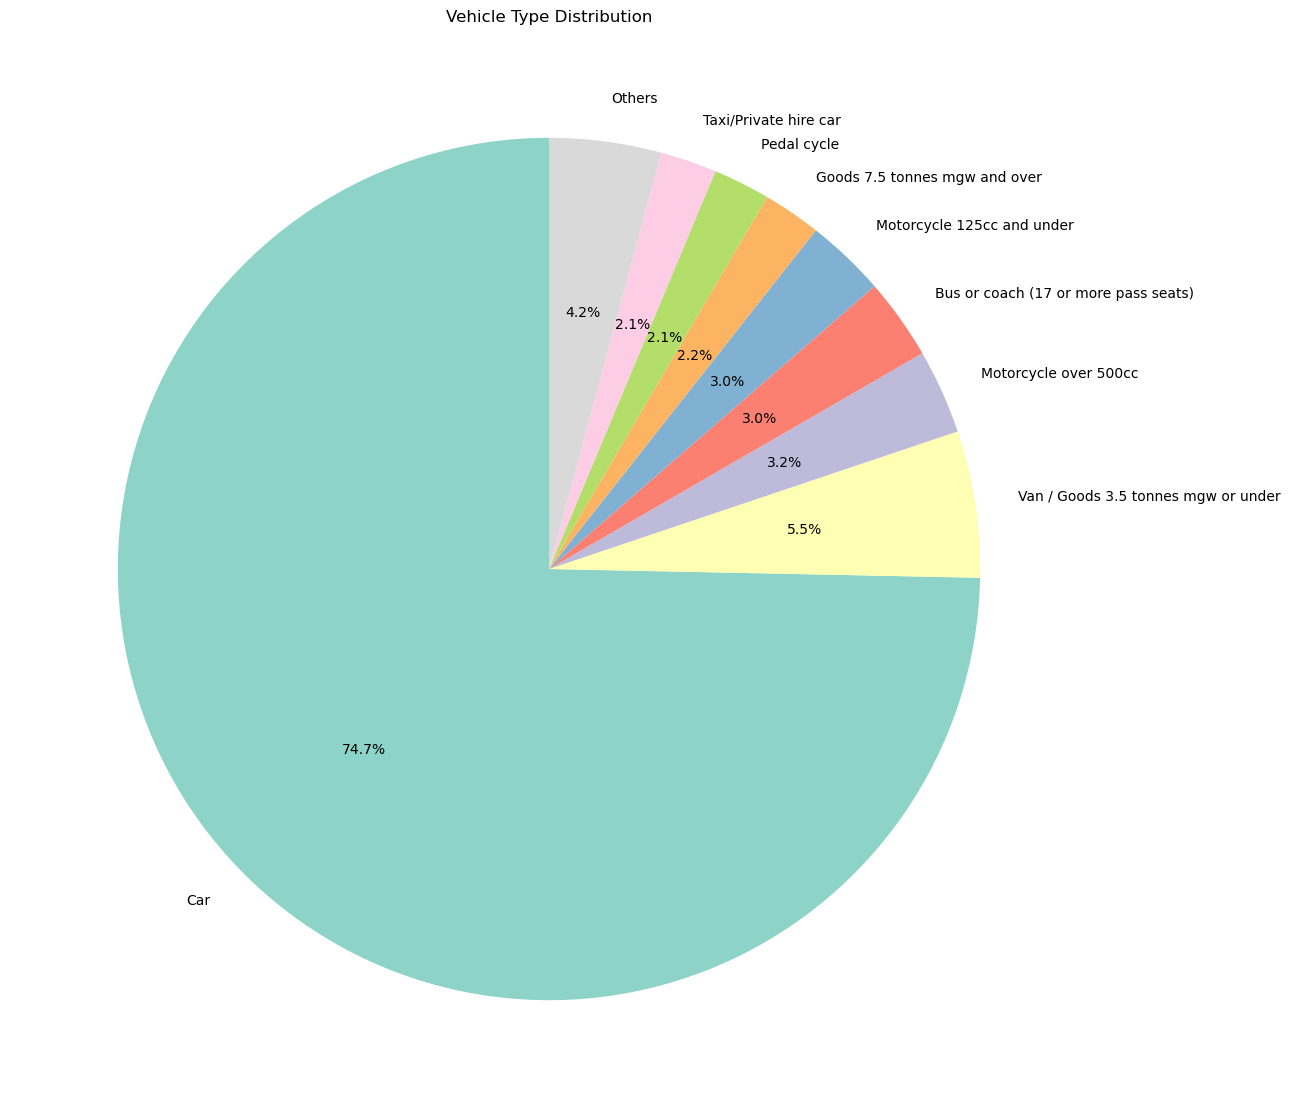

In [25]:
# define the threshold for others
threshold = 0.02

# find all categories with overall distribution lower threshold
mask = vehicle_counts / vehicle_counts.sum() < threshold

# calculate the total count for less frequent vehicle types
other_count = vehicle_counts.loc[mask].sum()

# filter out the less frequent types
vehicle_counts = vehicle_counts.loc[~mask]

# add the "Others" category
vehicle_counts['Others'] = other_count

# plot the pie chart with merged "Others" category 
plt.figure(figsize=(14, 14))
vehicle_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
# set title
plt.title('Vehicle Type Distribution')
plt.ylabel('')
plt.show()

From the pie chart, we can see the five most common types of vehicles involved in traffic accidents in UK are:
1. Car: 74.7%
2. Van / Goods 3.5 tonnes mgw or under: 5.5% 
3. Motorcycle over 500cc: 3.2 %
4. Bus or coach (17 or more pass seats): 3.0%
5. Motorcycle 125cc and under: 3.0% 

Car is as expected the most prevalent vehicle type, followed by Van / Goods 3.5 tonnes mgw or under, Motorcycle over 500cc, Bus or coach (17 or more pass seats) and Motorcycle 125cc and under, respectively.

A noticeable point can be seen here is all of these vehicle types can either move at very high speeds or are big types of vehicles. It would be very interesting if collision speeds during impacts of the accidents were recorded for further investigation. However, the data source did not include this attribute.  

#### a) Vehicle Types by Time
With the top 5 vehicle types above, I decided to further investigate them to see if there are any potential correlations with date and time. The multiple lines plot below shows the changes in the number of accidents involving these vehicle types over the years.

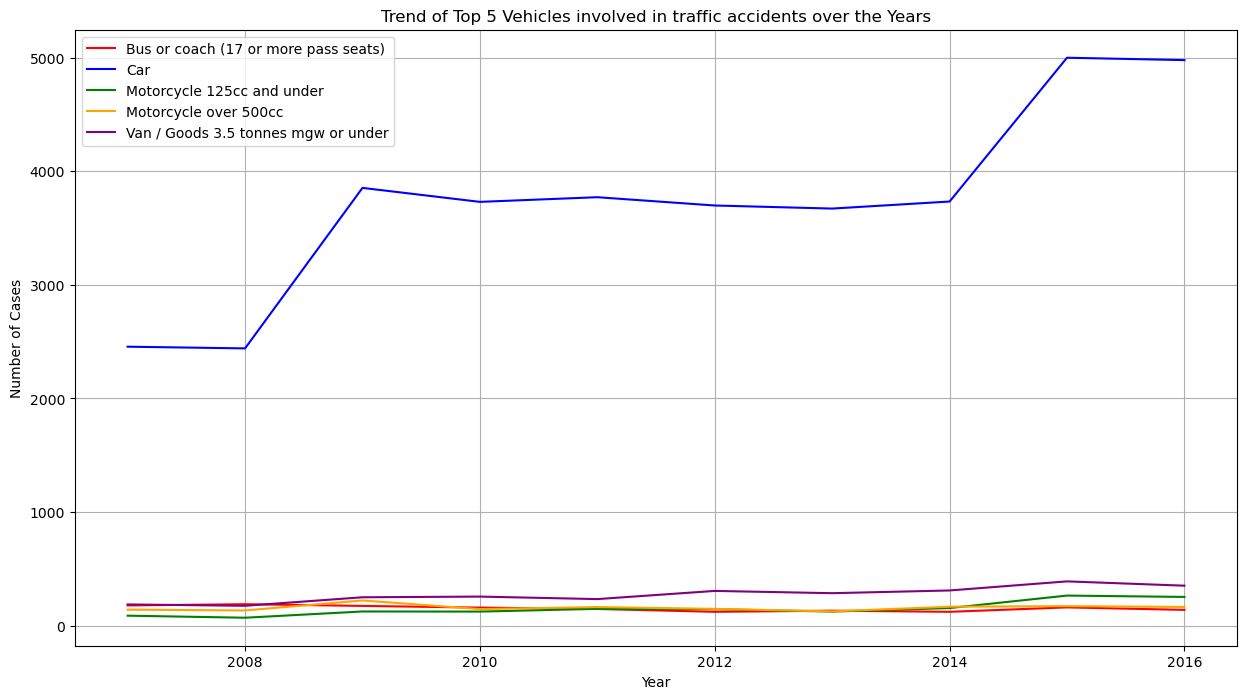

In [26]:
# create a list of top 5 vehicle types based on the pie chart above
top5_vehicles = ['Car', 'Van / Goods 3.5 tonnes mgw or under', 'Motorcycle over 500cc', 'Bus or coach (17 or more pass seats)', 'Motorcycle 125cc and under']
# create a dataframe only include the top 5 vehicle types
top5_vehicles_data = df[df['Vehicle_Type'].isin(top5_vehicles)]

# group the filtered data by year and vehicle type (updated ones) and calculate the count of cases
top5_df = top5_vehicles_data.groupby([top5_vehicles_data.index.year, 'Vehicle_Type']).size().unstack().fillna(0)

# a list of all used colors
line_colors = ['red', 'blue', 'green', 'orange', 'purple']

# plot the chart with multiple lines represent different vehicle types
plt.figure(figsize=(15,8))
for i, primary_type in enumerate(top5_df):
    plt.plot(top5_df.index, top5_df[primary_type], label=primary_type, color=line_colors[i])

# set title and label
plt.title('Trend of Top 5 Vehicles involved in traffic accidents over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

# display legend and grid
plt.legend()
plt.grid(True)

# show the plot
plt.show()

As the plot shows, the lines for Car are way above the other lines, strongly indicating the dominant numbers of cases involving Car. Surprisingly, the line seems to share the same pattern as the line plot for the number of accidents over the years from above. This can be explained by the number of cases involving Car is far greater than the total number of cases involving other types of vehicles, which will strongly affect the overall pattern and as in the multiple lines plot, the number for the Car type also rises gradually over the decade. Besides, the lines for other vehicle types show no noticeable changes over the years, which also explains the influence of Car type over the overall pattern. 

However, this warns me over the facts that there are potential biases while analyzing this dataset, as one type of vehicle becoming too dominant can affect the distribution and therefore cause misleading relationships and correlations. 

Overall, the lines plot doesn't seem to show any clear relationship between years and vehicle types, and is more suitable for investigating trends. To better recognize any potential correlations, I tried to shift my focus to days of the week and use heatmaps instead. A heatmap will be more appropriate for correlation investigation, as it provides a more detailed representation of differences in vehicle counts based on days of the week and the specific vehicle type. Examining heatmaps will help us identify patterns in traffic accidents across different days and vehicle types.

On the other hand, as the population size of each vehicle type varies significantly, I need to normalize the data for a fairer comparison, as data with larger values may be more important, which leads to bias. One approach for normalization is to use MinMaxScaler from sklearn.preprocessing library. Learning how to use this can be done through the link https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html and https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/.

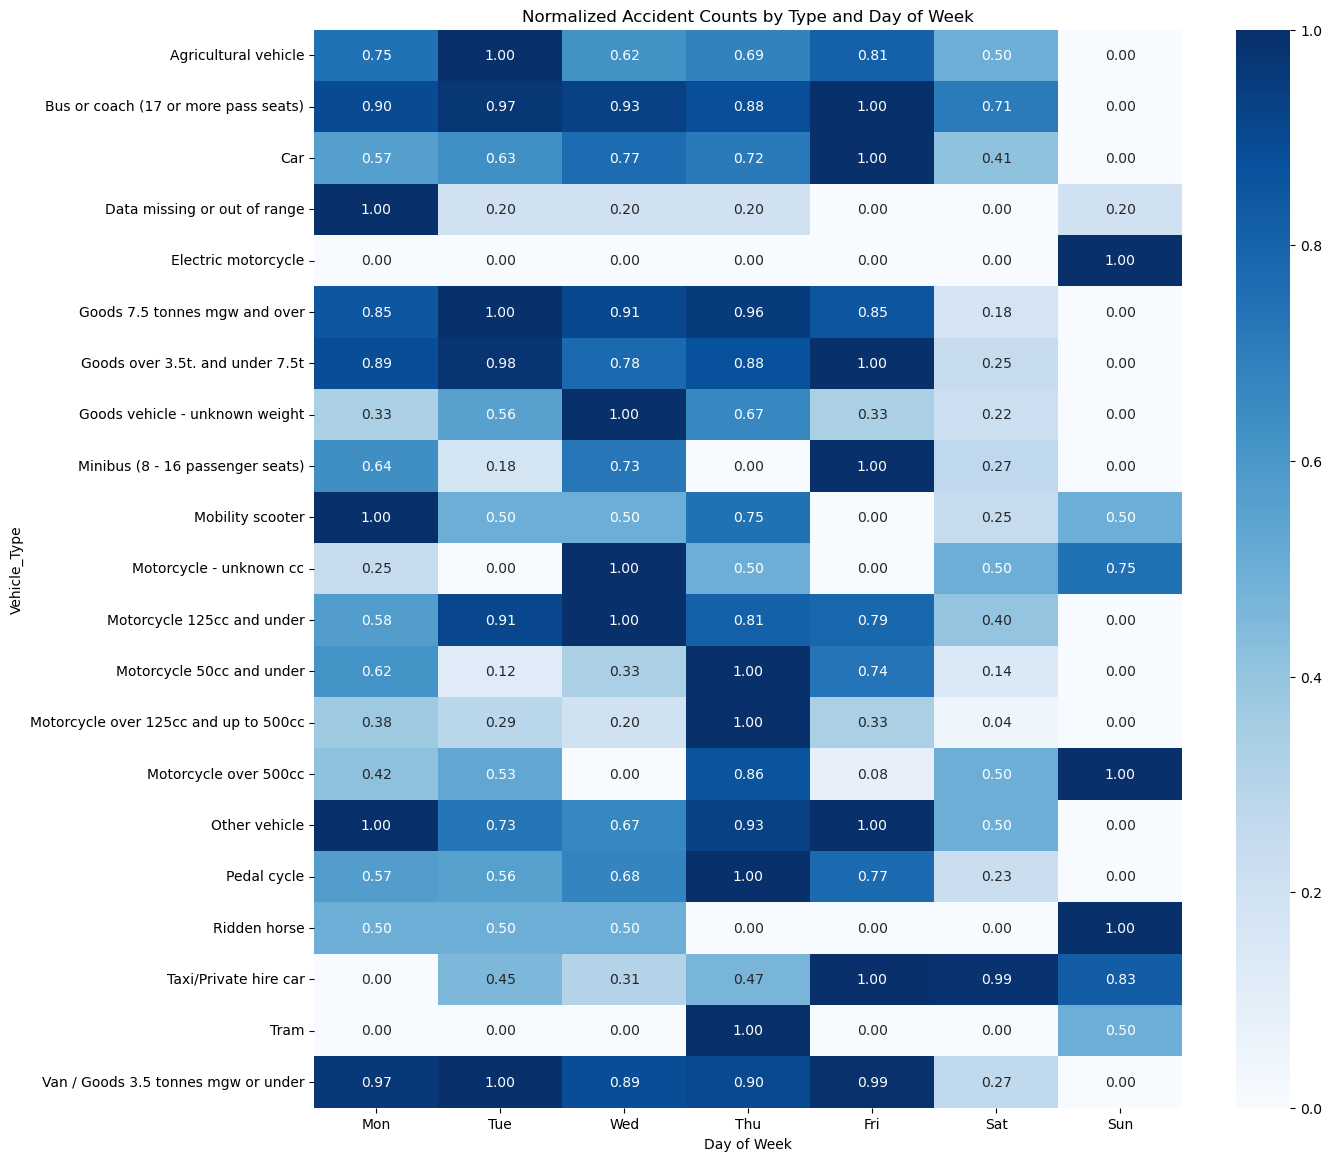

In [68]:
# import sklearn.preprocessing library
from sklearn.preprocessing import MinMaxScaler

# define the minmaxscaler
scaler = MinMaxScaler()

# define a pivot table to calculate accident counts by vehicle type and day of the week
dayofweek_by_type = df.pivot_table(values='Accident_Index', index=df['Vehicle_Type'], columns=df.index.dayofweek, aggfunc=np.size).fillna(0)

# create a list of labels for days of the week
dayofweek_by_type.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# normalizing the accident counts by calling minmaxscaler
dayofweek_by_type_normalized = pd.DataFrame(scaler.fit_transform(dayofweek_by_type.T).T, index=dayofweek_by_type.index, columns=dayofweek_by_type.columns)

# create the heatmap using seaborn
plt.figure(figsize=(14, 14))
sns.heatmap(dayofweek_by_type_normalized, cmap='Blues', annot=True, fmt='.2f')

# set the title and labels
plt.title('Normalized Accident Counts by Type and Day of Week')
plt.xlabel('Day of Week')

# display the heatmap
plt.show()

The heatmap from above does not show any clear relationships between vehicle types and day of the week although for some vehicle types like Motorcycle 125cc or Goods vehicle-unknown weight, there are peak days for them. The only choice left is to investigate the relationship between vehicle types and hours of the day. Normalization is also applied for a fair comparison. Below is a heatmap to visualize the correlation between vehicle types and hours of the day. 

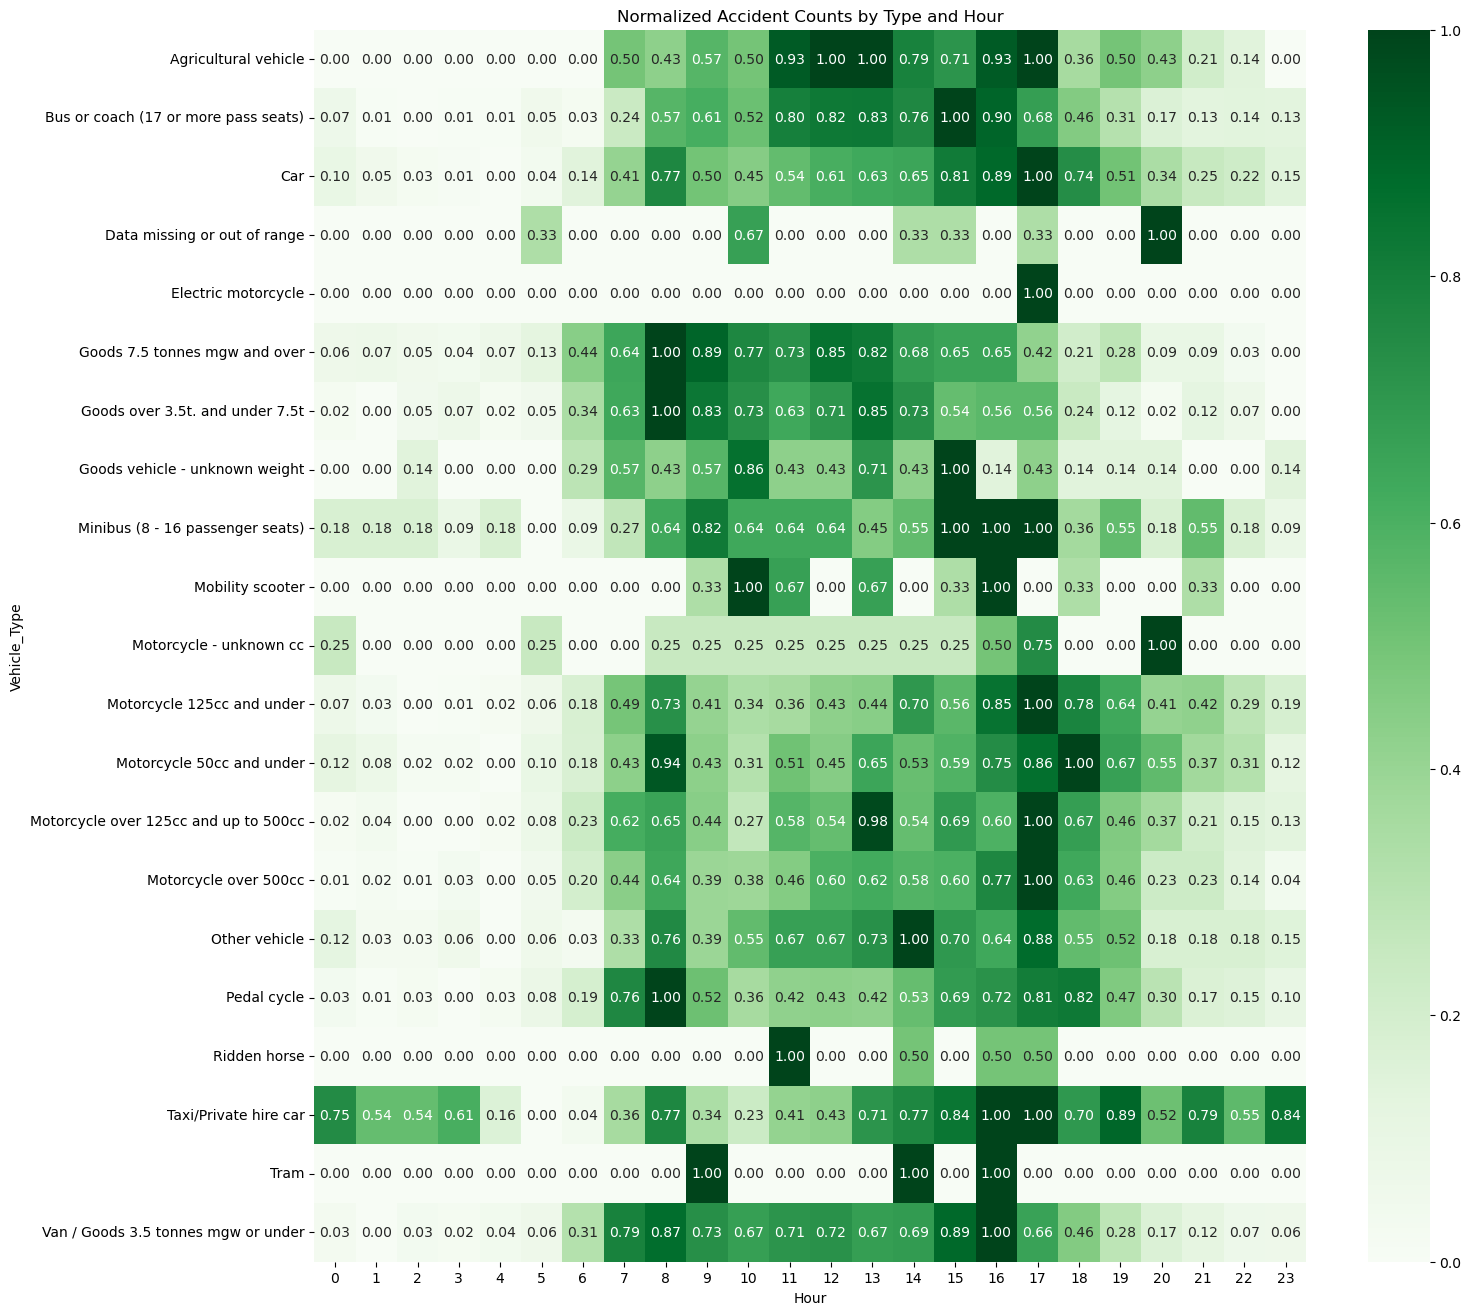

In [72]:
# define a pivot table to calculate accident counts by vehicle types and hour of the day
type_by_hour  = df.pivot_table(values='Accident_Index', index=df['Vehicle_Type'], columns=df.index.hour, aggfunc=np.size).fillna(0)

# normalizing the accident count by calling minmaxscaler
type_by_hour_normalized = pd.DataFrame(scaler.fit_transform(type_by_hour.T).T, index=type_by_hour.index, columns=type_by_hour.columns)

# create the heatmap using seaborn
plt.figure(figsize=(16, 16))
sns.heatmap(type_by_hour_normalized,cmap='Greens', annot=True, fmt='.2f')

# set the title and labels
plt.title('Normalized Accident Counts by Type and Hour')
plt.xlabel('Hour')

# display the heatmap
plt.show()

Looking at the heatmap, we can see clear correlations between vehicle types and hours of the day. Each vehicle type is moderately correlated with particular hours of the day. For example, accidents involving Motorbike type appear to be correlated with peak hours. Bus type is more frequently seen in the afternoon while most Goods types of traffic accidents happen in the morning. In contrast, there are outliers like Tram type, Ridden horse type, electric motorcycle type since the number of recorded accidents involving these vehicles is minimal, not enough for any useful investigation. Taxi/Private hire car works 24/7 so there are no clear patterns for them considering time series.

#### b) Vehicle Types by Locations

To investigate the correlations between vehicle types and locations, I take advantage of the recorded latitude and longitude of each accident for plotting. One way is to use a kernel density estimate (KDE) plot to examine the relationship between vehicle types and their respective locations. This plot provides a very informative visualization of the density of each vehicle type occurrence, offering insights into the spatial distribution of different types of vehicles involved in traffic accidents. Learning how to use KDE plot can be done through the link https://seaborn.pydata.org/generated/seaborn.kdeplot.html and https://www.geeksforgeeks.org/seaborn-kdeplot-a-comprehensive-guide/. Since there are 20 vehicle types, I pick the eight most significant vehicle types from the pie chart above for visualization.

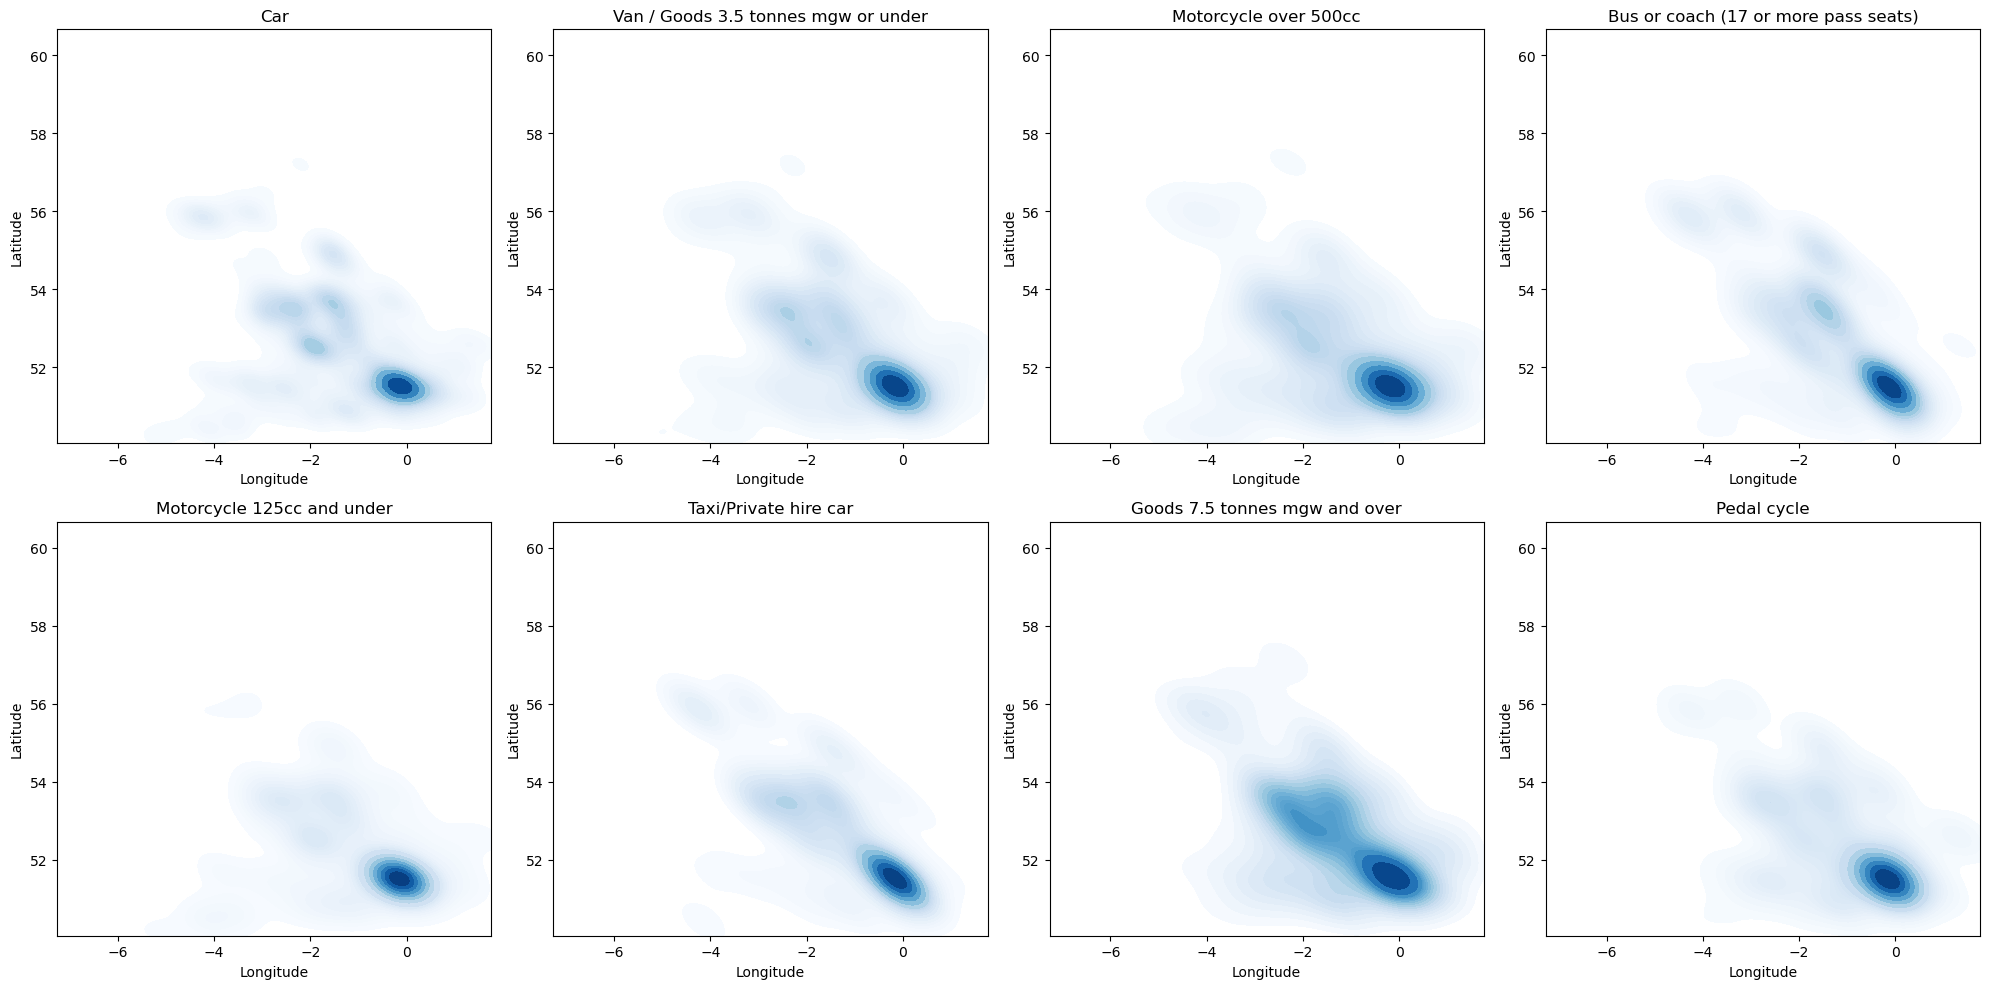

In [ ]:
# a list of top 8 vehicles type in traffic accident dataset based on the pie plot
top8_vehicles = ['Car', 'Van / Goods 3.5 tonnes mgw or under', 'Motorcycle over 500cc', 'Bus or coach (17 or more pass seats)', 'Motorcycle 125cc and under', 'Taxi/Private hire car', 'Goods 7.5 tonnes mgw and over', 'Pedal cycle']

# create a seperate dataframe for visualization
df_map = df

# create 8 subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 15))

for i, vehicle in enumerate(top8_vehicles):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # filter the dataframe for the current vehicle type
    vehicle_data = df_map[df_map['Vehicle_Type'] == vehicle]
    
    # plot the kde plot
    sns.kdeplot(data=vehicle_data, x='Longitude', y='Latitude', cmap='Blues', ax=ax, fill=True, levels=20)
    
    # set title for each subplot
    ax.set_title(vehicle)
    
    # adjust x-axis and y-axis limits
    ax.set_xlim(df_map['Longitude'].min(), df_map['Longitude'].max())  
    ax.set_ylim(df_map['Latitude'].min(), df_map['Latitude'].max())

plt.tight_layout()
plt.show()

From all subplots, we can see the same pattern that these vehicle types tend to be involved in traffic accidents in the same area (around 0 longitude and 52 latitude with very high density). This shows there are locations in the Uk that are prone to traffic accidents, which requires the local government to focus more on developing methods to help prevent traffic accidents. However, this is not enough for more detailed conclusions on correlations between vehicle types and locations. More information about the location of the traffic accidents like cities, and streets, ... is needed for further analysis.

In addition, we can try to figure out which regions in the UK have more traffic accidents than others using the provided coordinates. Folium Heatmap is the most suitable for this, as Folium library provides real interactive maps for visualization, which is very useful for navigating locations. Learning how to use Folium Heatmap can be done through the link https://python-visualization.github.io/folium/latest/getting_started.html and https://www.geeksforgeeks.org/visualizing-geospatial-data-using-folium-in-python/.  

In [28]:
import folium
from folium.plugins import HeatMap

# create a sample dataframe for the map
df_map = df.sample(n=5000)

# cast location info to float
df_map['Latitude'] = df_map['Latitude'].astype(float)
df_map['Longitude'] = df_map['Longitude'].astype(float)

# plot the map
map = folium.Map(location=[df_map['Latitude'].mean(), df_map['Longitude'].mean()],
                 tiles="OpenStreetMap", zoom_start=10)

# add marker for each data point
for index, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        # adjust the radius of the dot as needed
        radius=2,  
        color='orange',  
        fill=True,
        fill_color='blue'
    ).add_to(map)

# display the map
map

The map shows that most traffic accidents happen in big cities like London, Manchester, and Birmingham or intersections between different cities. A better way to see the density and intensity of traffic accidents is using a Heatmap overlay.

In [29]:
# create map
heatmap = folium.Map(location=[df_map['Latitude'].mean(), df_map['Longitude'].mean()], tiles='OpenStreetMap', zoom_start=10)

# create a list of coordinates
locations = df_map[['Latitude', 'Longitude']].values.tolist()

# add the layer to the map
HeatMap(locations).add_to(heatmap)

# display
heatmap

Looking into London, I notice several hotspots for traffic accidents like Knightsbridge, Bishopsgate, and Tottenham Court Road,... Using heatmap overlay is a better way to see the intensity of traffic accidents not just in cities but in details locations like streets, districts, etc.

### 2.2 Accident Severity Analysis

As it seems that investigation based on vehicle types correlations did not produce much useful information, I switched to analyzing the correlation between the severity of traffic accidents and various environmental conditions: "Light_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Weather_Conditions'. Also, investigations on human conditions like sex or age may provide interesting correlations with casualties.

The horizontal bar chart below shows the number of casualties of Uk traffic accidents based on age band. I grouped casualties by age band and used sum() to get the total number of casualties before creating a data frame for visualization.  

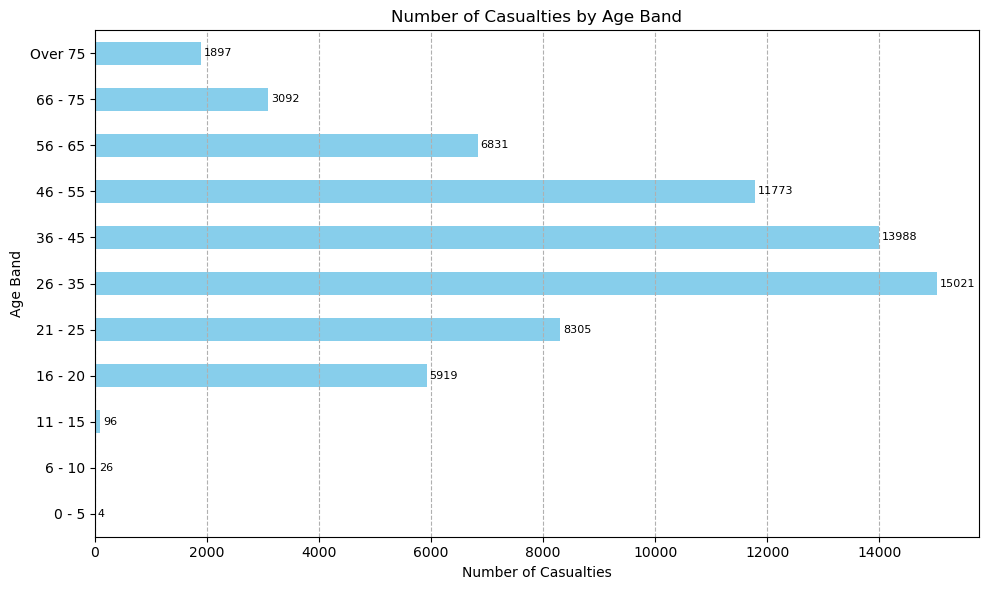

In [ ]:
# group the data by 'Age_Band_of_Driver' and get total number of casualties
casualties_by_age = df.groupby('Age_Band_of_Driver')['Number_of_Casualties'].sum()

# create a custom order
custom_sort_order = ['0 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '66 - 75', 'Over 75']

# sort the series by custom sort order
casualties_by_age = casualties_by_age.reindex(custom_sort_order)

# plot the horizontal chart
plt.figure(figsize=(10, 6))
bars = casualties_by_age.plot(kind='barh', color='skyblue')

# set titles and lables
plt.title('Number of Casualties by Age Band')
plt.xlabel('Number of Casualties')
plt.ylabel('Age Band')
# add grid for better visualization
plt.grid(axis='x', linestyle='--')

# add value labels on right side of each bar
for i, v in enumerate(casualties_by_age):
    plt.text(v + 50, i, str(v), ha='left',va='center', fontsize=8)

# display
plt.tight_layout()
plt.show()

It shows that people from 26 to 55 years old contribute significantly to the number of casualties recorded with the peak of 15021 belonging to "26-35" age bands. The number decreases as the age band grows. The residents whose ages are lower than 16 barely contribute to the chart. This can be explained as they are not allowed to drive since they haven't met the legal age for driving. 

As for sex, I use a bar plot the display the median number of casualties by sex. Firstly, I calculate the total number of casualties per sex per year and create a data frame to store the value. I then group the number of casualties by sex and calculate the median using median(). 

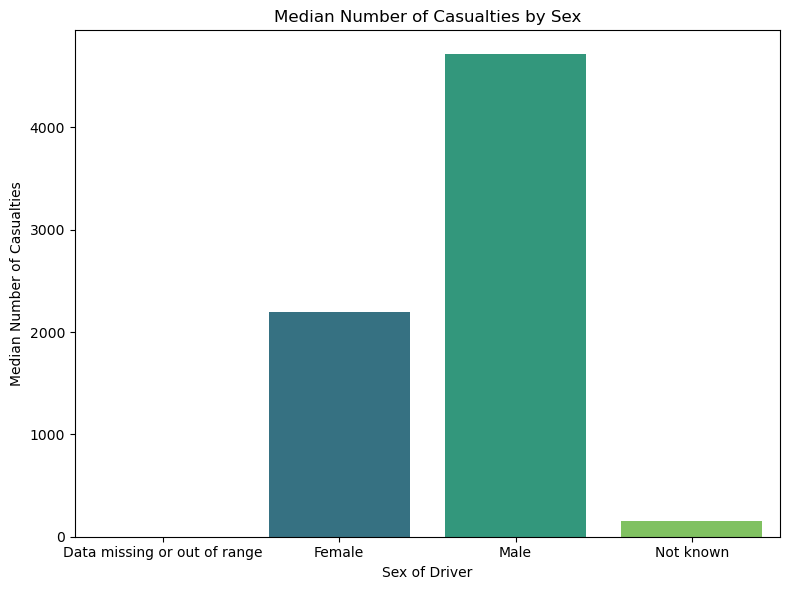

In [52]:
# calculate the sum of casualties for each sex per year
casualties_by_sex_year = df.groupby([df.index.year, 'Sex_of_Driver'])['Number_of_Casualties'].sum().reset_index()

# calculate the median number of casualties per sex
median_casualties_by_sex = casualties_by_sex_year.groupby('Sex_of_Driver')['Number_of_Casualties'].median().reset_index()

# plot the median number of casualties per sex
plt.figure(figsize=(8, 6))
sns.barplot(data=median_casualties_by_sex, x='Sex_of_Driver', y='Number_of_Casualties', palette='viridis')

# set titles and labels
plt.title('Median Number of Casualties by Sex')
plt.xlabel('Sex of Driver')
plt.ylabel('Median Number of Casualties')

# display the plot
plt.tight_layout()
plt.show()


From the chart, It is clear that the median number of casualties in traffic accidents when the drivers were male is two times the amount by female drivers. This indicates that male drivers contribute significantly to the number of casualties in traffic accidents compared to other sexes. However, this may be a result of having more male drivers recorded in the dataset. 

Moving on to analyze the severity of accidents based on weather conditions, a heatmap is proven to be unsuitable as all attributes are categorical. Luckily, in statistics, we can apply the Chi-square test of independence of variables to investigate whether two categorical variables are dependent or not. We can reject the null hypothesis and conclude the dependence is reasonable if p-values < 0.05. More details can be found here: https://www.statology.org/chi-square-test-of-independence/.

To apply the test to my investigation, I use chi2_contigency from scipy.stats. By creating contingency tables between each environmental attribute and "Accident_Severity" using pandas crosstab, I can apply chi2_contigency to find the p-values of each test and conclude the suitable attributes for further analysis. Learning how to use chi2_contigency can be tricky so here is a link to learn: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html and https://www.geeksforgeeks.org/python-pearsons-chi-square-test/. I researched on Stack Overflow and ChatGPT to learn how to use chi2_contingency.  

In [70]:
from scipy.stats import chi2_contingency

# define all categorical attributes for investigation
categorical_attributes = ['Light_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Weather_Conditions']

# get the contigency table using crosstab
contingency_tables = {}
for attribute in categorical_attributes:
    contingency_table = pd.crosstab(df['Accident_Severity'], df[attribute])
    contingency_tables[attribute] = contingency_table

# using chi2_contigency for  chi-square tests and get the p-values
p_values = {}
for attribute, contingency_table in contingency_tables.items():
    # we ignore any values not need from chi2_contingency call
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values[attribute] = p
    print(f"Contingency table for {attribute}:")
    print(contingency_table)
# output the p-values of each attribute
for attribute, p_value in p_values.items():
    print(f"P-value for {attribute}: {p_value}")
    
# Choose the top two attributes with the lowest p-values
# manual checking needed to ensure p-values is < 0.05 to reject the hypothesis
best_attributes = sorted(p_values, key=p_values.get)[:2]
print("Best attributes:", best_attributes)

Contingency table for Light_Conditions:
Light_Conditions   Darkness - lighting unknown  Darkness - lights lit  \
Accident_Severity                                                       
Fatal                                        7                    113   
Serious                                     62                   1216   
Slight                                     503                   7879   

Light_Conditions   Darkness - lights unlit  Darkness - no lighting  \
Accident_Severity                                                    
Fatal                                    4                     135   
Serious                                 37                     429   
Slight                                 189                    1748   

Light_Conditions   Data missing or out of range  Daylight  
Accident_Severity                                          
Fatal                                         0       390  
Serious                                       0      4691  
Sli

From the results above, we can see that all attributes are dependent on "Accident_Severity" as the p-values are all lower than 0.05. However, I only picked two examples for investigation, which are the "Urban_or_Rural_Area" and "Light_Conditions" attributes for plotting as they have the two lowest p-values among all attributes. 

Rather than creating two different bar plots, I decided to create two stacked bar subplots using the contingency tables I created earlier. Using stacked bar plots helps show clear correlations between two categories of two categorical attributes. 

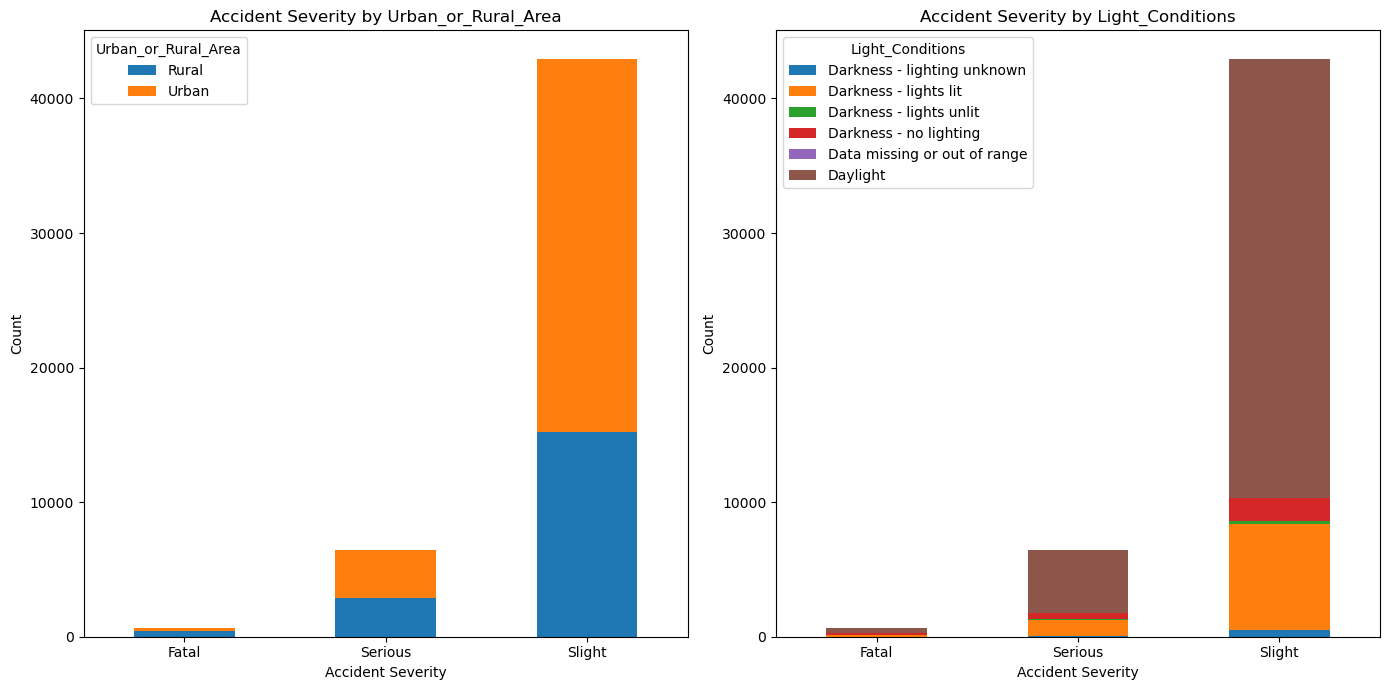

In [71]:
plt.figure(figsize=(14, 7))
for i, attribute in enumerate(best_attributes, 1):
    # adjust the plot to start from 1
    plt.subplot(1, 2, i)
    # get the contigency table for attribute
    contingency_table = contingency_tables[attribute]
    # plot the contigency table
    contingency_table.plot(kind='bar', stacked=True, ax=plt.gca())
    # set title and labels based on best attributes value
    plt.title(f'Accident Severity by {attribute}')
    plt.xlabel('Accident Severity')
    plt.xticks(rotation=0)
    plt.ylabel('Count')
    # get the legend
    plt.legend(title=attribute)
    
# display the table
plt.tight_layout()
plt.show()


As we can see, most traffic accidents' severity levels are serious and slight with slight being the dominant. Only a minimal amount of cases are fatal. 

The plot on the left shows that more serious and slight cases happened in urban areas compared to rural areas. However, when it comes to fatal cases, they are more likely to be in rural areas. This can be explained as there is less traffic density in rural areas compared to urban areas, which may result in less focus on driving or driving at high speeds. These reasons can contribute highly to some fatal cases. 

Considering the plot on the right, It is very surprising to see that more cases happened in daylight compared to when the lighting condition is dark. It also seems that there is a strong correlation between lighting condition and severity because the more serious the severity is, the worse the lighting condition. In darkness, more cases happen when the lighting condition is bad such as no lighting.  

# Conclusion

There are significant findings in the "UK Traffic Accident" analysis regarding the number of cases over time, the severity of accidents, and hotspots for traffic accidents. From 2007 to 2016, there is a significant rise in the number of traffic accidents in the UK with Cars as the most involved type of vehicle over the years. July and November are the months where accidents occur the most. Accidents happened more frequently during weekdays, and increased gradually from Monday to Friday, especially during rush hours (7-9 am) and (4-6 pm). Moreover, traffic accidents gathered more in big cities and in particular locations, indicating changes in laws and solutions from local authorities.

Regarding vehicle types in traffic accidents, Car stands as the most dominant category, followed by Vans / Goods 3.5 tonnes mgw or under, Motorcycle over 500cc, Bus or coach (17 or more pass seats), Motorcycle 125cc and under. Different types of vehicles in traffic accidents display different trends over hours of the day, as Goods are more involved in the morning, cars and motorcycles are more prevalent during rush hours and Taxis are at any hour since they operate 24/7. However, when it comes to locations, no significant patterns were found for each vehicle type, suggesting a different approach to obtain better results. In addition, detailed locations of the accidents are missing, which also makes it more difficult to find patterns of each vehicle type in traffic accidents.

The age band that is involved the most in traffic accidents is from 26 to 55 years old with male drivers causing more casualties than other sexes. Environmental conditions like road conditions, weather conditions, rural or urban areas, and lighting conditions have strong correlations to the severity of the accident. While most serious and slight cases happened in urban areas, fatal cases occurred more in rural areas. Most of the recorded cases's severity is slight and the number of cases reduces as the level of severity increases. More cases happened in daylight compared to in darkness, but the worse the lighting conditions, the more fatal the cases are. 

Overall, the fact that the number of cases has increased over the years even though there are locations where accidents keep happening requires the UK government to tackle the issues more seriously. Details of accidents' locations like streets, blocks, districts, and cities should be recorded for effective tracking patterns of locations where accidents occurred and vehicles involved to prevent similar accidents in the future.  